In [1]:
#Importing required libraries

import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import json

In [3]:
#Tweet_limits = 500000

#tweet_list = [] #Creating list to append tweet data to

#for i,tweet in enumerate(sntwitter.TwitterSearchScraper('ethereum since:2020-03-21 until:2022-04-30').get_items()):
#    if i>Tweet_limits:
#        break
#    tweet_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

In [4]:
#with open('ethereumtweet.json','w') as f:
#    json.dump(tweet_list,f, default=str)

In [5]:
df = pd.read_json('bitcointweets.json')
df

,0,1,2,3
0,2022-04-29 23:59:58+00:00,1520191193321295872,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...,cr_bitcoin
1,2022-04-29 23:59:58+00:00,1520191192243265536,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,WorldCoinIndex
2,2022-04-29 23:59:58+00:00,1520191191098265608,#silver ape alert emergency update. Jump in : ...,AMoneyfest
3,2022-04-29 23:59:56+00:00,1520191181937954817,The Dilemma Faced by All Beginners in the Bitc...,pilscoop
4,2022-04-29 23:59:55+00:00,1520191176854454273,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,LivePriceCrypto
...,...,...,...,...
42908,2022-04-29 08:26:42+00:00,1519956326759157763,Truth is that your “save the planet from #Bitc...,CarlBMenger
42909,2022-04-29 08:26:40+00:00,1519956319733751809,Bitcoin ATM installed in Mexico's Senate Build...,blizzy_shane
42910,2022-04-29 08:26:28+00:00,1519956267569233920,Ünlü Yatırım Bankasından Dünyada Bir İlk! Bitc...,cointr
42911,2022-04-29 08:26:24+00:00,1519956251907657728,#BTC #bitcoin GÜNCEL ANALİZ\nDostlar grafiğe e...,KriptoAcmi


In [6]:
df.rename(columns = {0:'Datetime'}, inplace = True)
df.rename(columns = {1:'Tweet_id'}, inplace = True)
df.rename(columns = {2:'Tweet'}, inplace = True)
df.rename(columns = {3:'User'}, inplace = True)

In [7]:
df.head()

,Datetime,Tweet_id,Tweet,User
0,2022-04-29 23:59:58+00:00,1520191193321295872,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...,cr_bitcoin
1,2022-04-29 23:59:58+00:00,1520191192243265536,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,WorldCoinIndex
2,2022-04-29 23:59:58+00:00,1520191191098265608,#silver ape alert emergency update. Jump in : ...,AMoneyfest
3,2022-04-29 23:59:56+00:00,1520191181937954817,The Dilemma Faced by All Beginners in the Bitc...,pilscoop
4,2022-04-29 23:59:55+00:00,1520191176854454273,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,LivePriceCrypto


In [8]:
with open('bitcointweet.json','w') as f:
    json.dump(df,f, default=str)

In [9]:
#Creating dataframe

#twitter_data = pd.DataFrame(tweet_list, columns=['datetime', 'tweet_Id', 'text', 'Username'])

# Display first 5 entries from dataframe
#twitter_data.tail()

In [10]:
tweets = df

In [11]:
# Dropping all the data but tweets

tweets.drop('Datetime', inplace=True, axis=1)
tweets.drop('Tweet_id', inplace=True, axis=1)
tweets.drop('User', inplace=True, axis=1)

In [12]:
tweets.head()

,Tweet
0,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...
1,Bitcoin price index https://t.co/o7UcHJUhC6 #U...
2,#silver ape alert emergency update. Jump in : ...
3,The Dilemma Faced by All Beginners in the Bitc...
4,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...


In [13]:
# Cleaning the data from #,link,spcial unwanted symbols, etc....

def cleanTwt(twt):
    twt = re.sub('#', '', twt)
    #twt = re.sub('#Bitcoin', 'Bitcoin', twt)
    twt = re.sub('#[A-Za-z0-9]', '', twt)
    twt = re.sub('\\n', '', twt)
    twt = re.sub('https?:\/\/\S+', '', twt)
    twt = re.sub("@[A-Za-z0-9]+","",twt)
    twt = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", twt)
    twt = " ".join(twt.split())
    #twt = twt.replace("#", "").replace("", " ")
    return twt

In [14]:
tweets['Clean_Tweets'] = tweets['Tweet'].apply(cleanTwt)

In [15]:
tweets.head()

,Tweet,Clean_Tweets
0,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...,"Bitcoin (BTC) Price Update: Price: $38,651Last..."
1,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,Bitcoin price index USD EUR CNY GBP RUB
2,#silver ape alert emergency update. Jump in : ...,silver ape alert emergency update. Jump in : L...
3,The Dilemma Faced by All Beginners in the Bitc...,The Dilemma Faced by All Beginners in the Bitc...
4,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...


In [16]:
tweets.shape

(42913, 2)

In [17]:
# understanding polarity and Subjectivity of the tweets

def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

tweets['Subjectivity'] = tweets['Clean_Tweets'].apply(getSubjectivity)

tweets['Polarity'] = tweets['Clean_Tweets'].apply(getPolarity)

In [18]:
tweets.head()

,Tweet,Clean_Tweets,Subjectivity,Polarity
0,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...,"Bitcoin (BTC) Price Update: Price: $38,651Last...",0.000000,0.000000
1,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,Bitcoin price index USD EUR CNY GBP RUB,0.000000,0.000000
2,#silver ape alert emergency update. Jump in : ...,silver ape alert emergency update. Jump in : L...,0.500000,0.136364
3,The Dilemma Faced by All Beginners in the Bitc...,The Dilemma Faced by All Beginners in the Bitc...,0.535714,0.285714
4,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...,0.066667,0.000000


In [19]:
#sentiment analysis based on Polarity marks

def Sentiment(marks):
    if marks < 0:
        return 'Negative'
    elif marks == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [20]:
tweets['Sentiments'] = tweets['Polarity'].apply(Sentiment)

In [21]:
tweets.head()

,Tweet,Clean_Tweets,Subjectivity,Polarity,Sentiments
0,#Bitcoin (#BTC) Price Update:\n \nPrice: $3...,"Bitcoin (BTC) Price Update: Price: $38,651Last...",0.000000,0.000000,Neutral
1,Bitcoin price index https://t.co/o7UcHJUhC6 #U...,Bitcoin price index USD EUR CNY GBP RUB,0.000000,0.000000,Neutral
2,#silver ape alert emergency update. Jump in : ...,silver ape alert emergency update. Jump in : L...,0.500000,0.136364,Positive
3,The Dilemma Faced by All Beginners in the Bitc...,The Dilemma Faced by All Beginners in the Bitc...,0.535714,0.285714,Positive
4,#Bitcoin Last Price $38575 #BTC 🚀\nDaily Indic...,Bitcoin Last Price $38575 BTC 🚀Daily Indicator...,0.066667,0.000000,Neutral


In [22]:
#Plotting scatter plot between Polarity and Subjectivity


#plt.figure(figsize = (8,6))
#for i in range(0, tweets.shape[0]):
#    plt.scatter(tweets['Polarity'][i], tweets['Subjectivity'],[i],color='Blue')
#plt.show()

<AxesSubplot:>

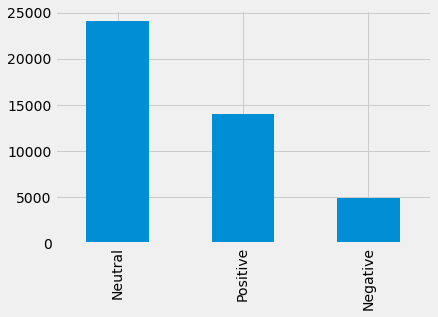

In [23]:
#Plotting and understanding the public sentiments

tweets['Sentiments'].value_counts().plot(kind = 'bar')